In [ ]:
import pandas as pd

# Load the data
file_path = 'Final_Lyrics_Data.csv'
lyrics_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
lyrics_data.head()


,artists,track_name,track_genre,Lyrics
0,3 Doors Down,Kryptonite,rock,"Well, I took a walk around the world to ease m..."
1,American Authors,Best Day Of My Life,rock,"(Woo, oh-oh, oh-oh, oh)\n\n\nI had a dream so ..."
2,Arctic Monkeys,Perfect Sense,rock,"Richard of York, the Executive Branch\nHaving ..."
3,The Black Keys,Keep My Name Outta Your Mouth,rock,Cry to myself and hanging 'round\nThis old ves...
4,AJR,World's Smallest Violin,rock,My grandpa fought in World War II\nHe was such...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

# Function to clean and tokenize lyrics
def clean_tokenize_lyrics(lyrics):
    # Convert to lowercase
    lyrics = lyrics.lower()
    # Remove punctuation
    lyrics = lyrics.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(lyrics)
    return tokens

# Apply the function to the lyrics column
lyrics_data['tokens'] = lyrics_data['Lyrics'].apply(clean_tokenize_lyrics)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from collections import Counter

def most_used_words_by_genre(df):
    genre_word_count = {}
    for genre in df['track_genre'].unique():
        all_words = [word for tokens in df[df['track_genre'] == genre]['tokens'] for word in tokens]
        word_freq = Counter(all_words)
        genre_word_count[genre] = word_freq.most_common(10)
    return genre_word_count

most_used_words = most_used_words_by_genre(lyrics_data)
print(most_used_words)


{'rock': [('i', 3633), ('you', 3350), ('the', 3325), ('a', 1922), ('to', 1870), ('and', 1806), ('me', 1403), ('my', 1344), ('in', 1126), ('it', 1076)], 'pop': [('you', 5003), ('i', 4861), ('the', 4126), ('to', 2443), ('and', 2322), ('me', 2236), ('a', 2027), ('my', 1680), ('it', 1636), ('in', 1426)], 'country': [('the', 3636), ('i', 3392), ('you', 3108), ('a', 2464), ('and', 2377), ('to', 1686), ('me', 1406), ('in', 1363), ('it', 1361), ('on', 1315)], 'rap': [('the', 8624), ('i', 6693), ('you', 4897), ('a', 4672), ('to', 4003), ('and', 3976), ('in', 3043), ('it', 2973), ('my', 2884), ('me', 2463)]}


In [ ]:
# Function to remove stop words
def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Apply the function to the tokens column
lyrics_data['filtered_tokens'] = lyrics_data['tokens'].apply(remove_stop_words)

# Retrieve the most-used words excluding stop words
most_used_words_no_stop = most_used_words_by_genre(lyrics_data)
print(most_used_words_no_stop)


{'rock': [('i', 3633), ('you', 3350), ('the', 3325), ('a', 1922), ('to', 1870), ('and', 1806), ('me', 1403), ('my', 1344), ('in', 1126), ('it', 1076)], 'pop': [('you', 5003), ('i', 4861), ('the', 4126), ('to', 2443), ('and', 2322), ('me', 2236), ('a', 2027), ('my', 1680), ('it', 1636), ('in', 1426)], 'country': [('the', 3636), ('i', 3392), ('you', 3108), ('a', 2464), ('and', 2377), ('to', 1686), ('me', 1406), ('in', 1363), ('it', 1361), ('on', 1315)], 'rap': [('the', 8624), ('i', 6693), ('you', 4897), ('a', 4672), ('to', 4003), ('and', 3976), ('in', 3043), ('it', 2973), ('my', 2884), ('me', 2463)]}


In [ ]:
def unique_words_by_genre(df):
    genre_unique_words = {}
    for genre in df['track_genre'].unique():
        genre_tokens = df[df['track_genre'] == genre]['filtered_tokens']
        all_words = [word for tokens in genre_tokens for word in tokens]
        other_words = [word for tokens in df[df['track_genre'] != genre]['filtered_tokens'] for word in tokens]
        unique_words = set(all_words) - set(other_words)
        genre_unique_words[genre] = list(unique_words)
    return genre_unique_words

unique_words = unique_words_by_genre(lyrics_data)
print(unique_words)


{'rock': ['fruck', 'fruitlessly', 'whatsitcalled', 'blanched', 'silverscreen', 'ribbons', 'restrain', 'puppet', 'anesthesia', 'gaffer', 'woahohohohoh', 'spyin', 'kflay', 'remainsee', 'quotation', 'rurun', 'bopbopbop', 'uniform', 'savvy', 'censorship', 'encumbered', 'refresh', 'warmup', 'zooming', 'ladadada', 'caryou', 'unicorn', '5you', 'parkеd', 'boris', 'circlin', 'ache', 'thine', 'marquee', 'chiefs', 'cornerstone', 'oohoohoohoohoohoohooh', 'brownsville', 'freindship', 'bizzies', 'insist', 'clеarly', 'grinners', 'senseless', 'kooks', 'metaphorically', 'onsee', 'politicians', 'woodstock', 'gained', 'universals', 'archers', 'acame', 'baggies', 'blindеd', 'sterile', 'foresee', 'yesterdays', '36you', 'ambassadors', 'borrowing', 'scholar', 'indecision', 'novelties', 'intolerant', 'fishnets', 'damnation', 'cardboard', 'dozer', 'beholds', 'backroad', 'liiiiiiife', 'mymymy', 'windmill', 'existance', '70s', 'joyridesee', 'keane', 'velveteen', 'cavities', 'canny', 'surе', 'empowered', 'unfurl'

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Function to detect themes using LDA
def detect_themes(df, n_topics=5, n_top_words=10):
    lyrics = df['Lyrics'].tolist()
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(lyrics)
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(dtm)

    themes = []
    for topic_idx, topic in enumerate(lda.components_):
        theme = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        themes.append(theme)
    return themes

themes = detect_themes(lyrics_data)
print(themes)


[['got', 'ain', 'people', 'right', 'pum', 'mary', 'know', 'say', 'come', 'better'], ['oh', 'yeah', 'love', 'don', 'know', 'just', 'll', 'ooh', 've', 'wanna'], ['la', 'na', 'da', 'ain', 'don', 'good', 'got', 'way', 'just', 'time'], ['said', 'just', 'didn', 'time', 'know', 'little', 'day', 'll', 'don', 'woman'], ['got', 'don', 'yeah', 'ain', 'nigga', 'know', 'bitch', 'shit', 'fuck', 'niggas']]


Latent Dirichlet Allocation (LDA) is a popular form of statistical topic modeling. In LDA, documents are represented as a mixture of topics and a topic is a bunch of words. Those topics reside within a hidden, also known as a latent layer.

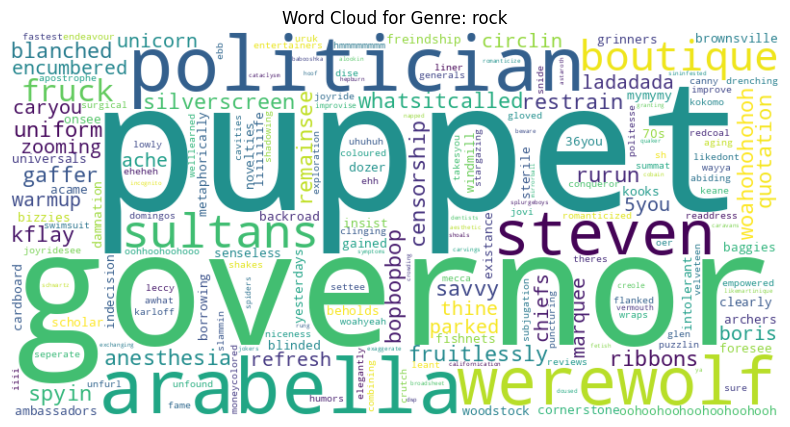

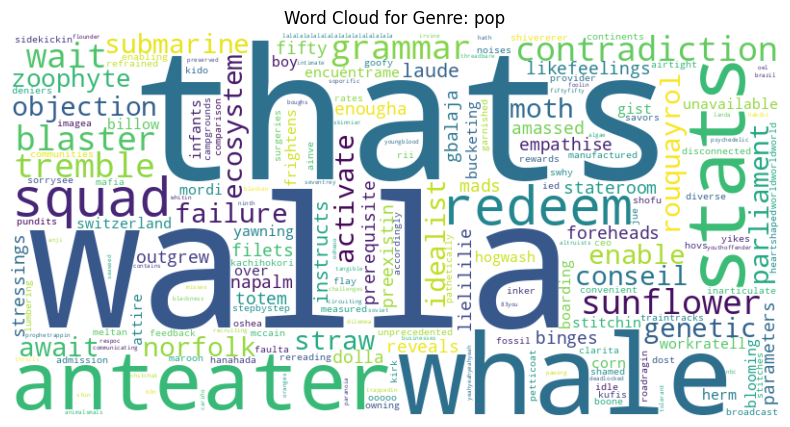

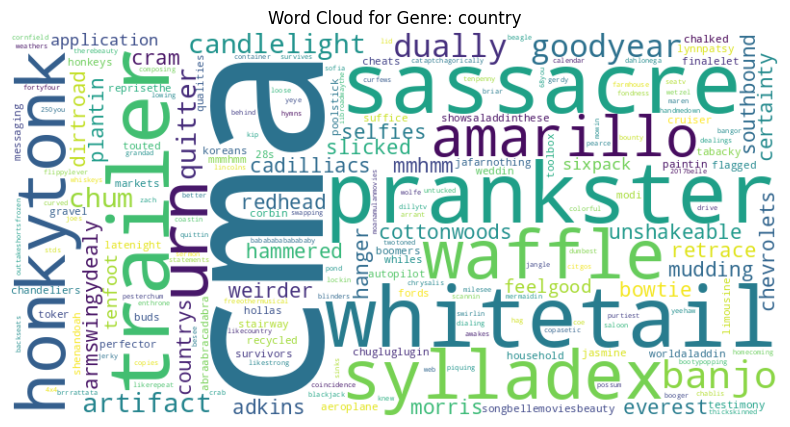

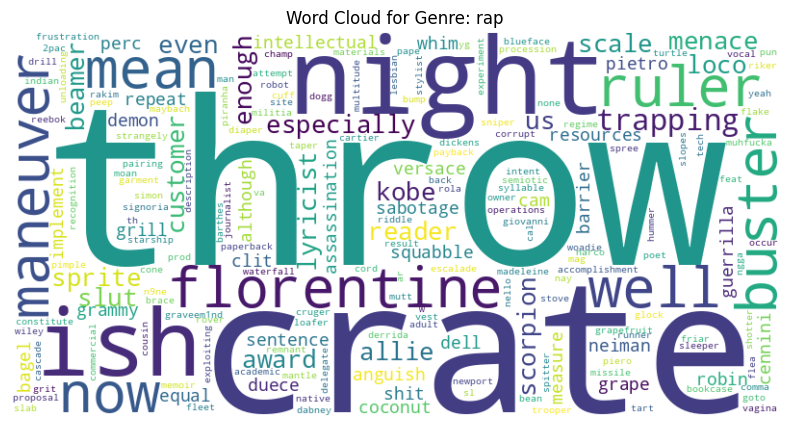

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to create word clouds for each genre
def create_word_clouds(unique_words):
    for genre, words in unique_words.items():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Genre: {genre}')
        plt.show()

# Generate word clouds for unique words by genre
create_word_clouds(unique_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    [well, took, walk, around, world, ease, troubl...
1    [woo, ohoh, ohoh, oh, dream, big, loud, jumped...
2    [richard, york, executive, branch, fun, warmup...
3    [cry, hanging, round, old, vessel, running, ro...
4    [grandpa, fought, world, war, ii, noble, dude,...
Name: filtered_tokens, dtype: object


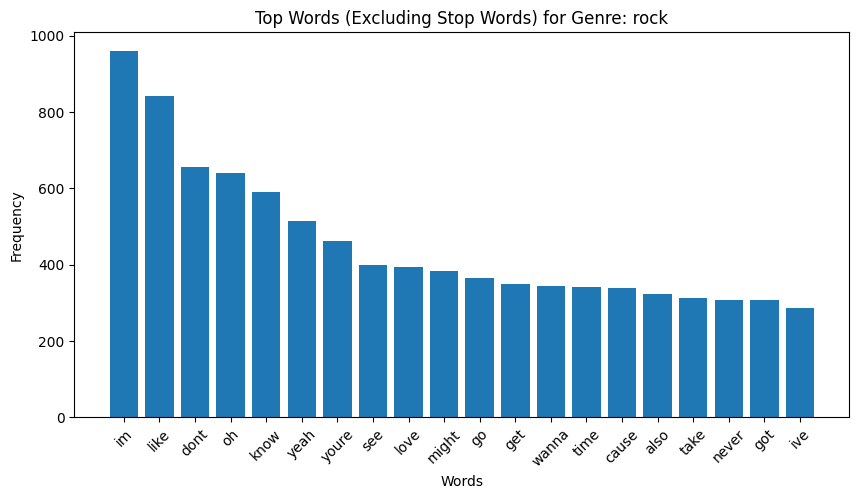

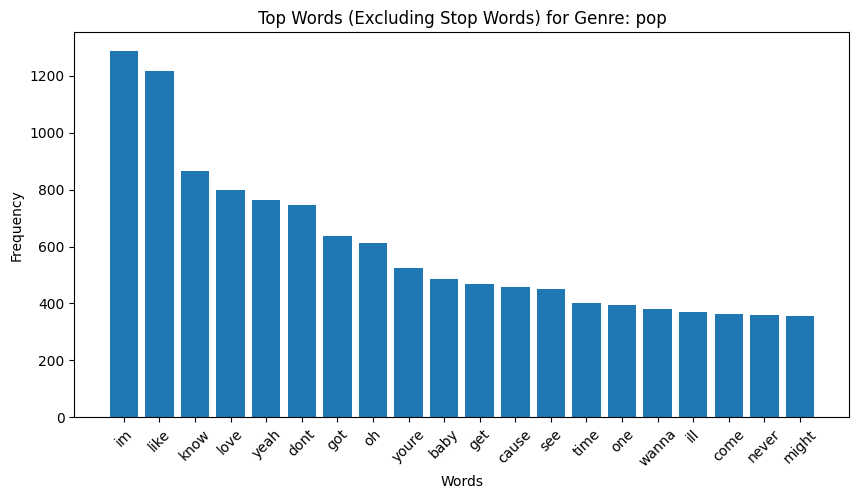

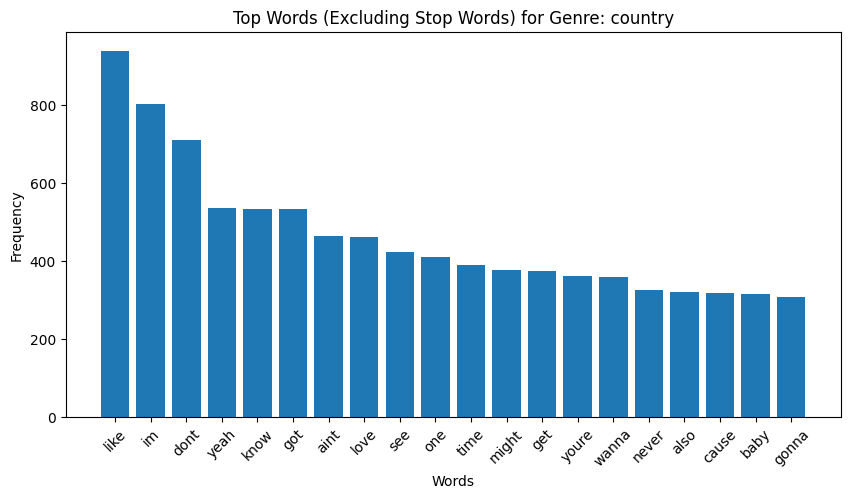

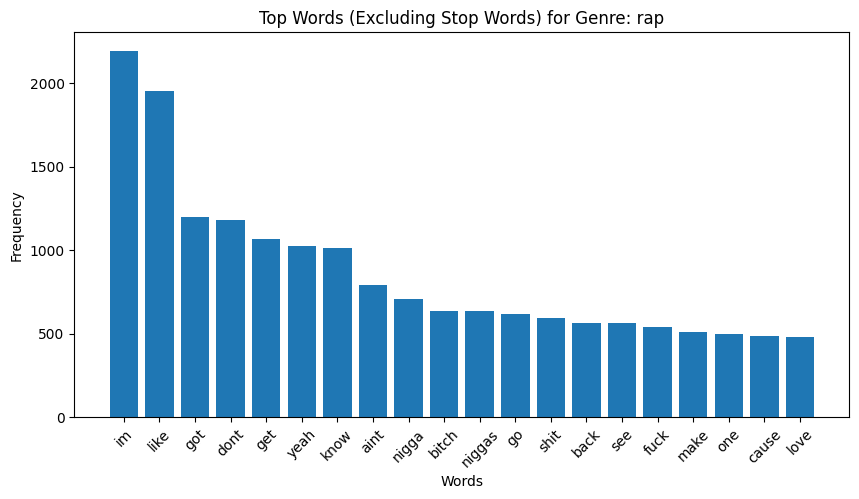

In [ ]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Function to clean and tokenize lyrics
def clean_tokenize_lyrics(lyrics):
    lyrics = lyrics.lower()
    lyrics = re.sub(r'[^\w\s]', '', lyrics)  # Remove punctuation
    tokens = lyrics.split()
    return tokens

# Apply the function to the lyrics column
lyrics_data['tokens'] = lyrics_data['Lyrics'].apply(clean_tokenize_lyrics)

# Function to remove stop words
def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    additional_stop_words = {'i', 'you', 'me', 'my', 'it'}
    stop_words.update(additional_stop_words)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Apply the function to the tokens column
lyrics_data['filtered_tokens'] = lyrics_data['tokens'].apply(remove_stop_words)

# Verify if stop words are removed
print(lyrics_data['filtered_tokens'].head())

# Function to retrieve the most-used words by genre
def most_used_words_by_genre(df):
    genre_word_count = {}
    for genre in df['track_genre'].unique():
        all_words = [word for tokens in df[df['track_genre'] == genre]['filtered_tokens'] for word in tokens]
        word_freq = Counter(all_words)
        genre_word_count[genre] = word_freq.most_common(20)
    return genre_word_count

most_used_words_no_stop = most_used_words_by_genre(lyrics_data)

# Function to create bar charts for top words excluding stop words
def create_bar_charts(most_used_words_no_stop):
    for genre, words in most_used_words_no_stop.items():
        labels, counts = zip(*words)
        plt.figure(figsize=(10, 5))
        plt.bar(labels, counts)
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.title(f'Top Words (Excluding Stop Words) for Genre: {genre}')
        plt.xticks(rotation=45)
        plt.show()

# Generate bar charts for top words excluding stop words
create_bar_charts(most_used_words_no_stop)


Detecting themes for genre: rock


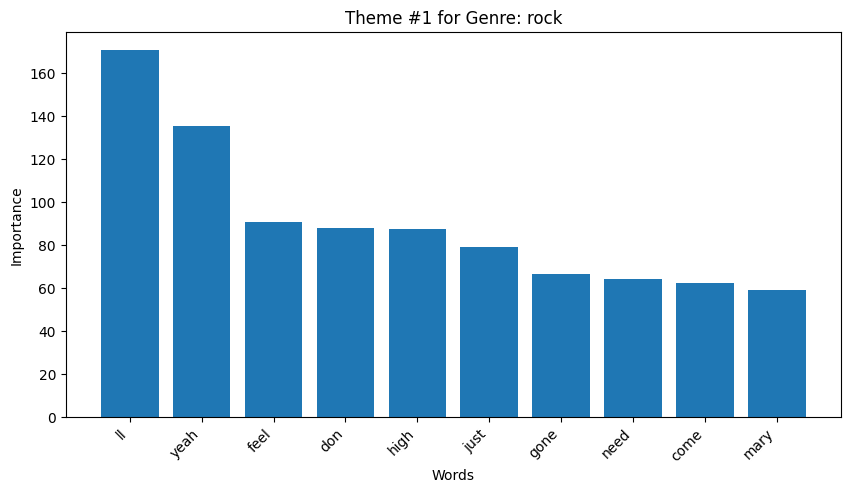

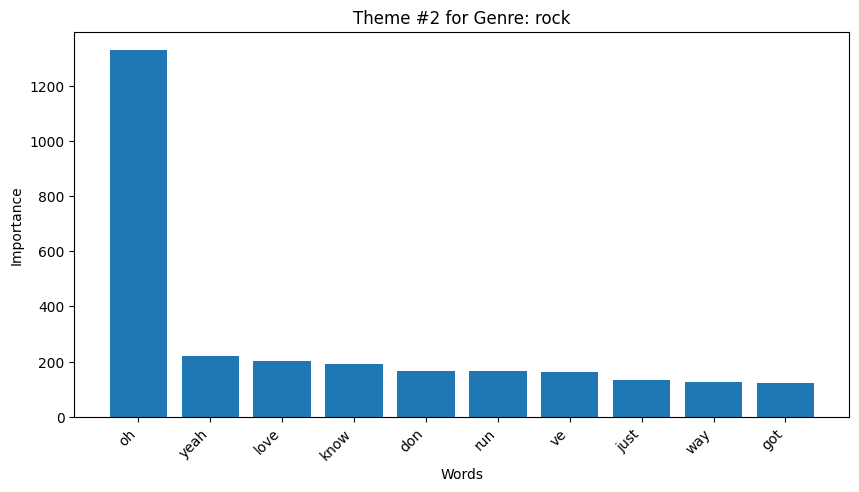

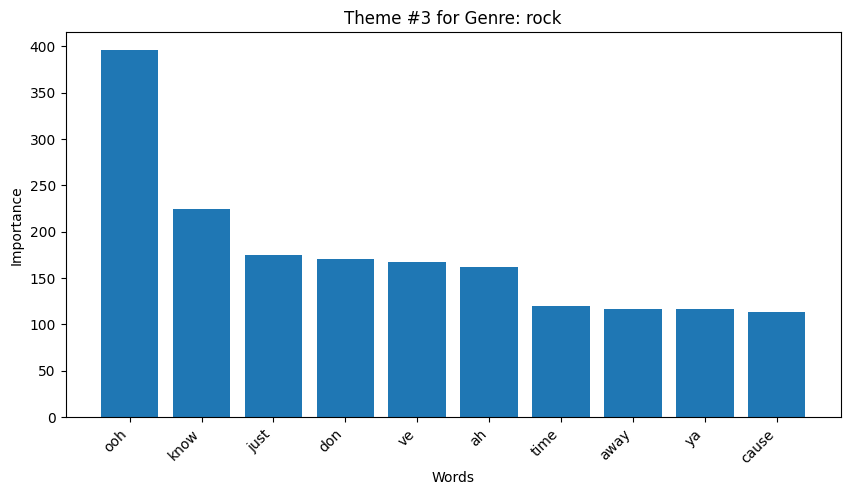

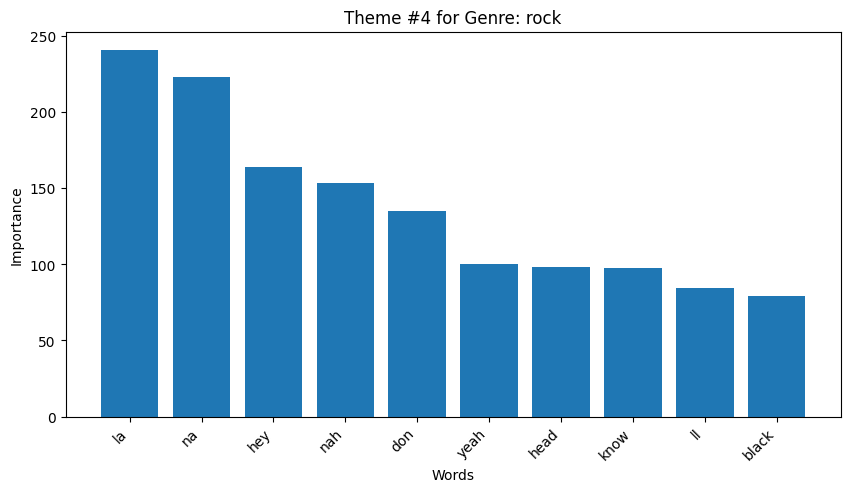

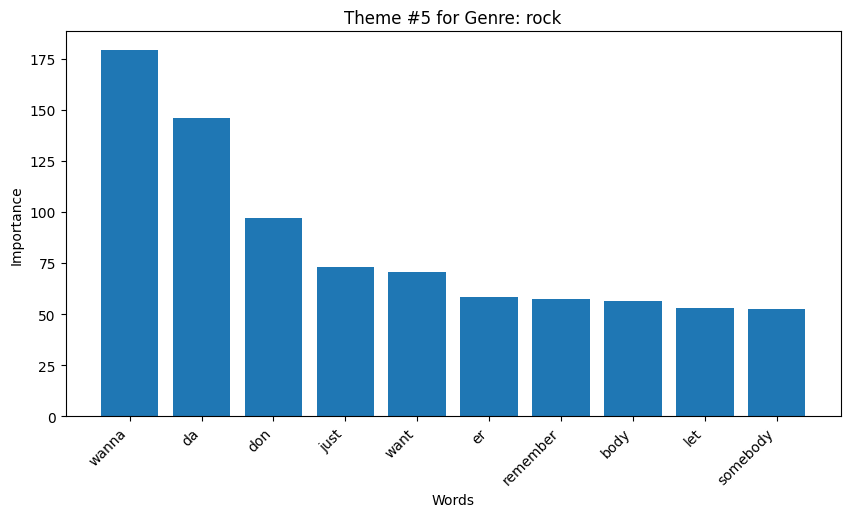

Themes for rock: [['ll', 'yeah', 'feel', 'don', 'high', 'just', 'gone', 'need', 'come', 'mary'], ['oh', 'yeah', 'love', 'know', 'don', 'run', 've', 'just', 'way', 'got'], ['ooh', 'know', 'just', 'don', 've', 'ah', 'time', 'away', 'ya', 'cause'], ['la', 'na', 'hey', 'nah', 'don', 'yeah', 'head', 'know', 'll', 'black'], ['wanna', 'da', 'don', 'just', 'want', 'er', 'remember', 'body', 'let', 'somebody']]
Detecting themes for genre: pop


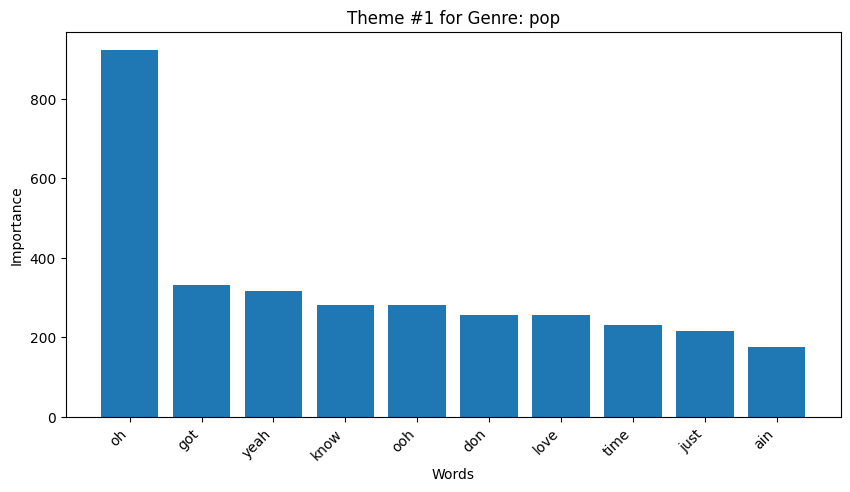

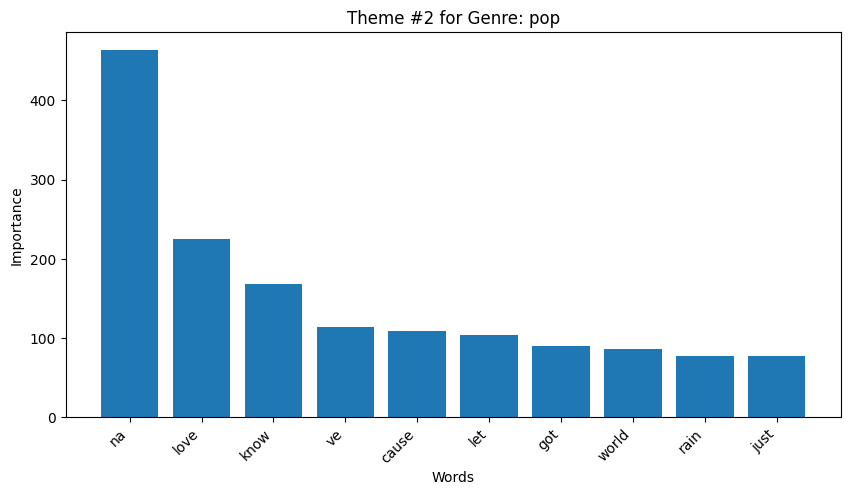

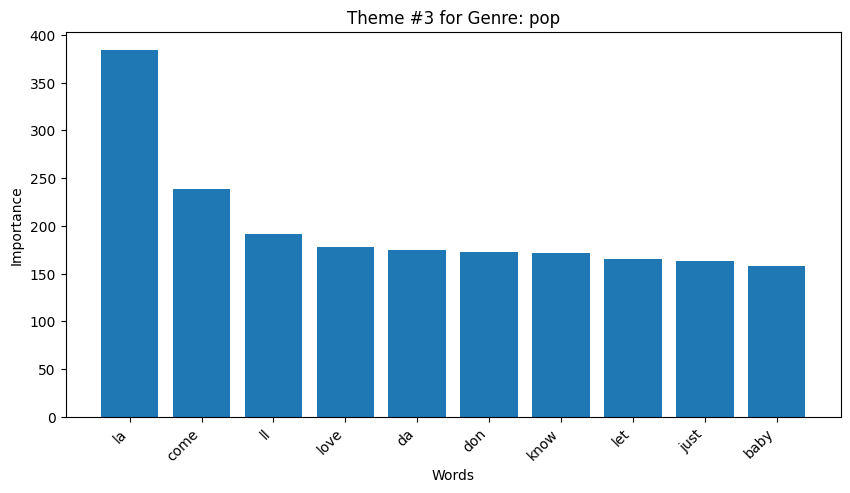

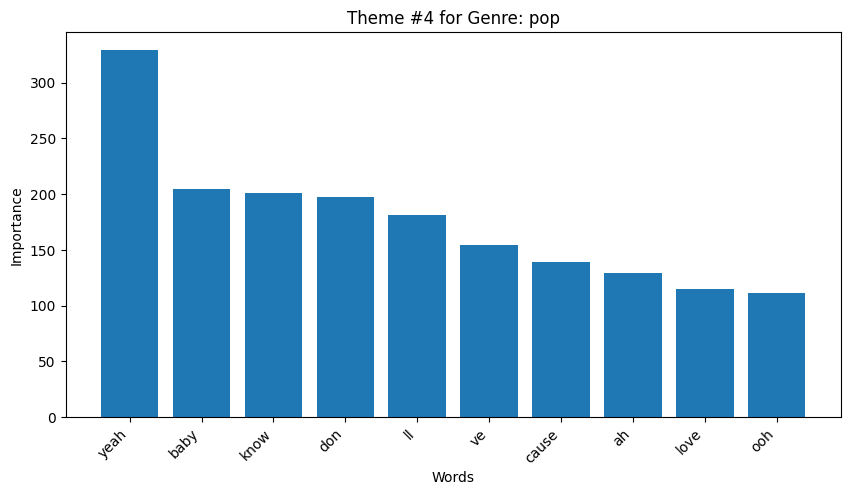

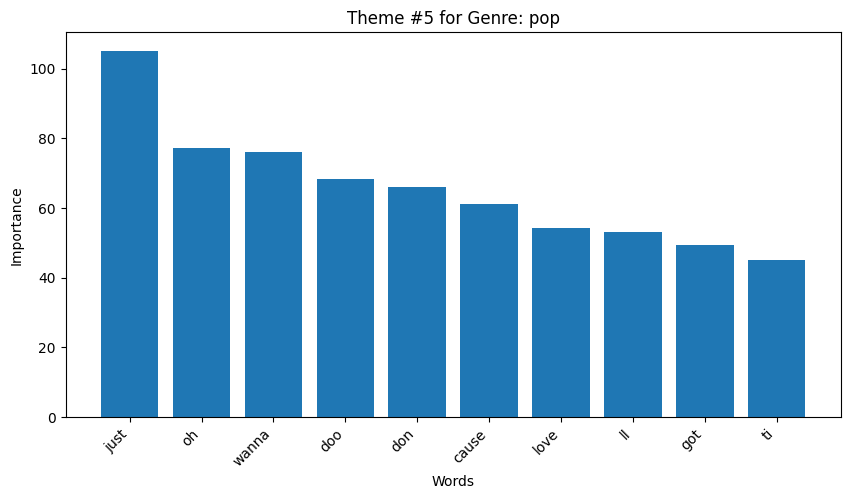

Themes for pop: [['oh', 'got', 'yeah', 'know', 'ooh', 'don', 'love', 'time', 'just', 'ain'], ['na', 'love', 'know', 've', 'cause', 'let', 'got', 'world', 'rain', 'just'], ['la', 'come', 'll', 'love', 'da', 'don', 'know', 'let', 'just', 'baby'], ['yeah', 'baby', 'know', 'don', 'll', 've', 'cause', 'ah', 'love', 'ooh'], ['just', 'oh', 'wanna', 'doo', 'don', 'cause', 'love', 'll', 'got', 'ti']]
Detecting themes for genre: country


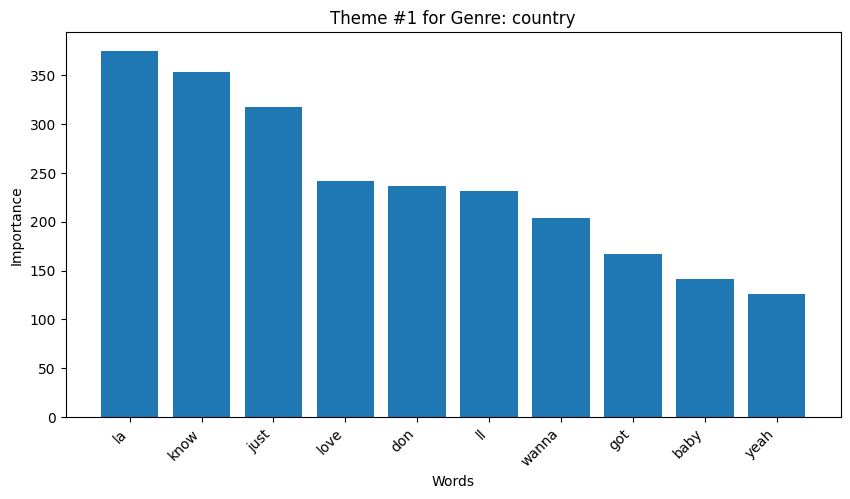

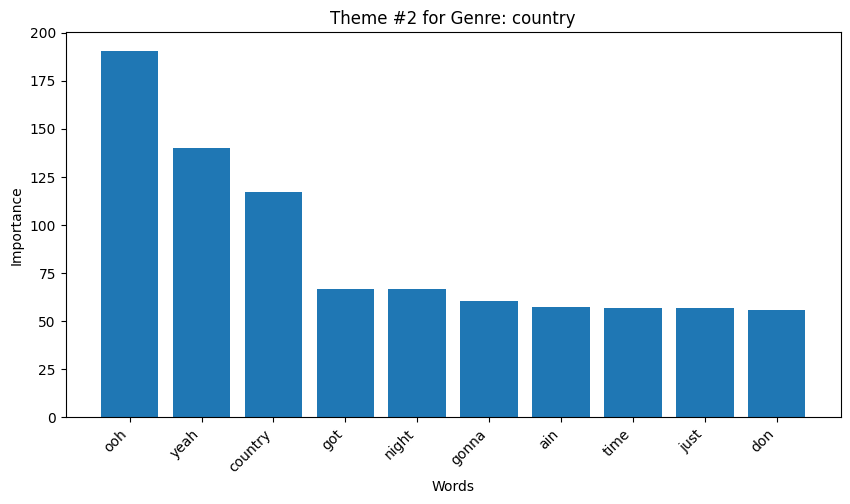

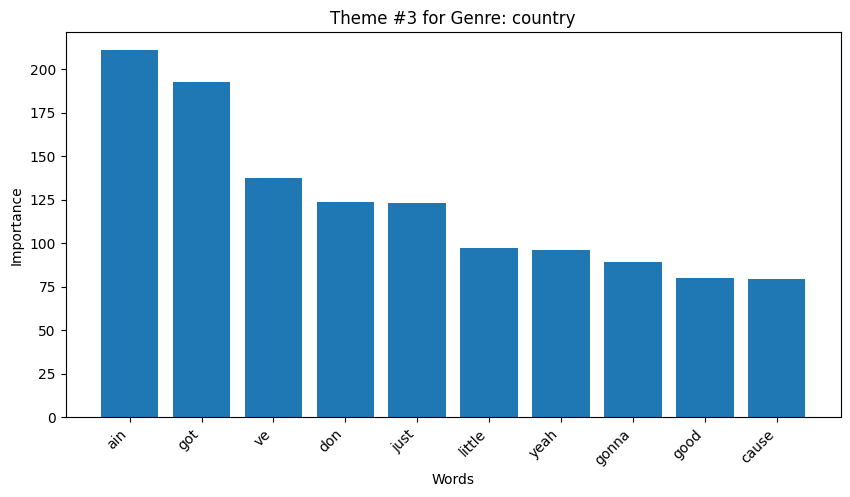

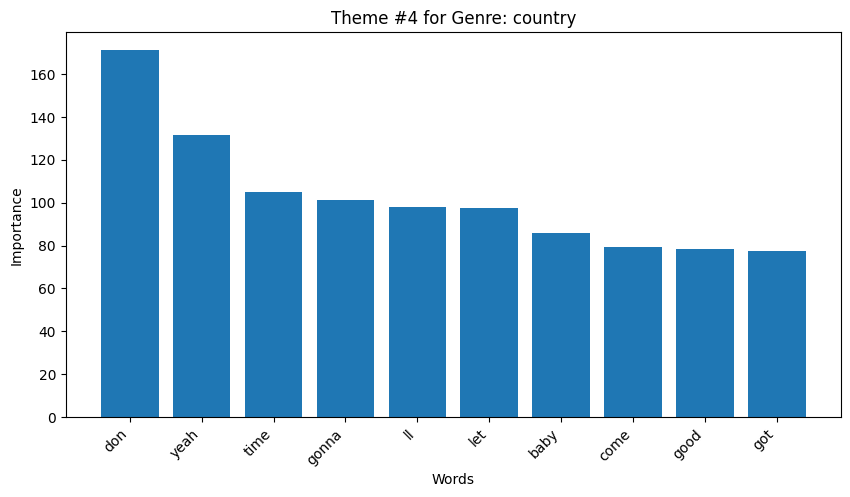

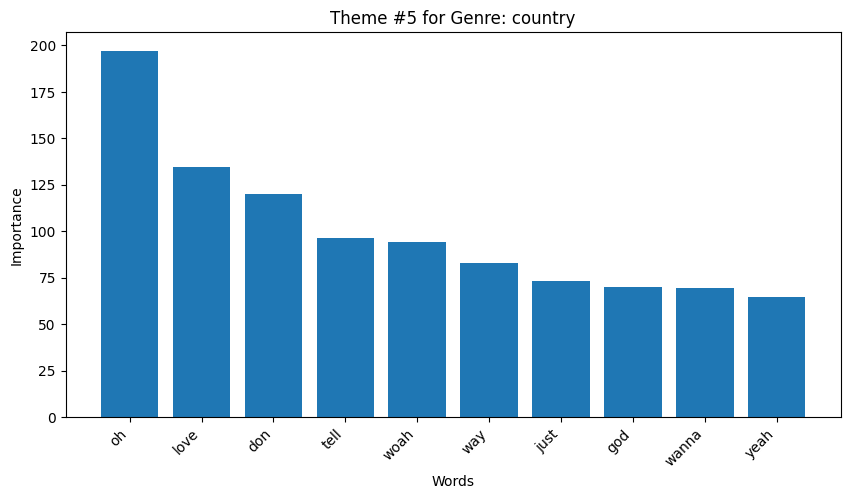

Themes for country: [['la', 'know', 'just', 'love', 'don', 'll', 'wanna', 'got', 'baby', 'yeah'], ['ooh', 'yeah', 'country', 'got', 'night', 'gonna', 'ain', 'time', 'just', 'don'], ['ain', 'got', 've', 'don', 'just', 'little', 'yeah', 'gonna', 'good', 'cause'], ['don', 'yeah', 'time', 'gonna', 'll', 'let', 'baby', 'come', 'good', 'got'], ['oh', 'love', 'don', 'tell', 'woah', 'way', 'just', 'god', 'wanna', 'yeah']]
Detecting themes for genre: rap


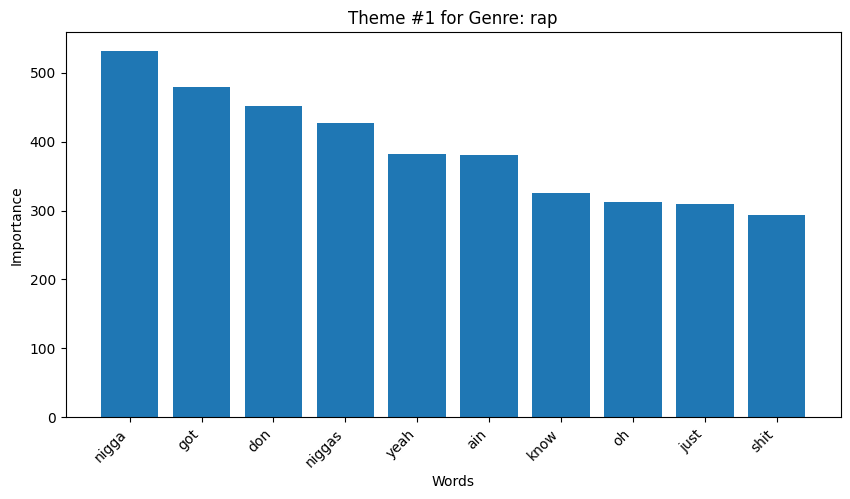

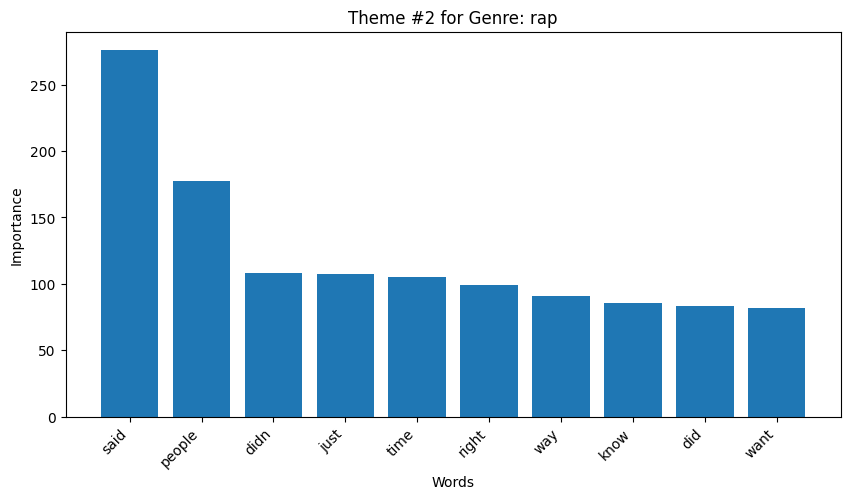

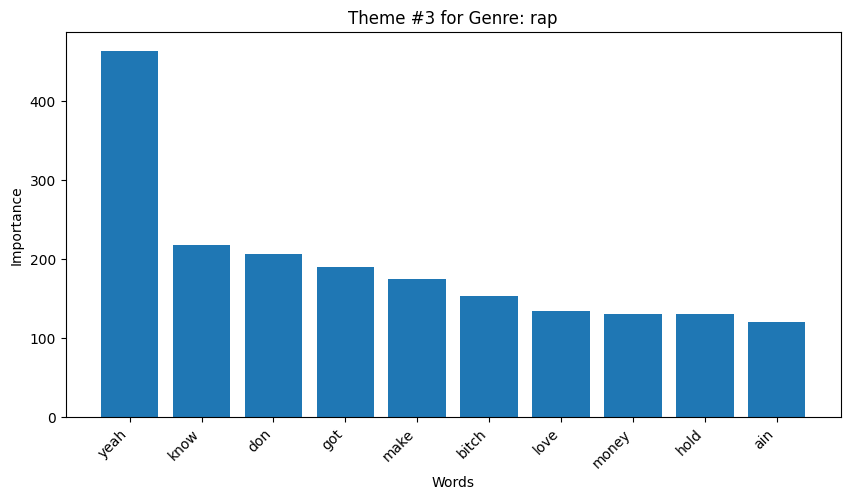

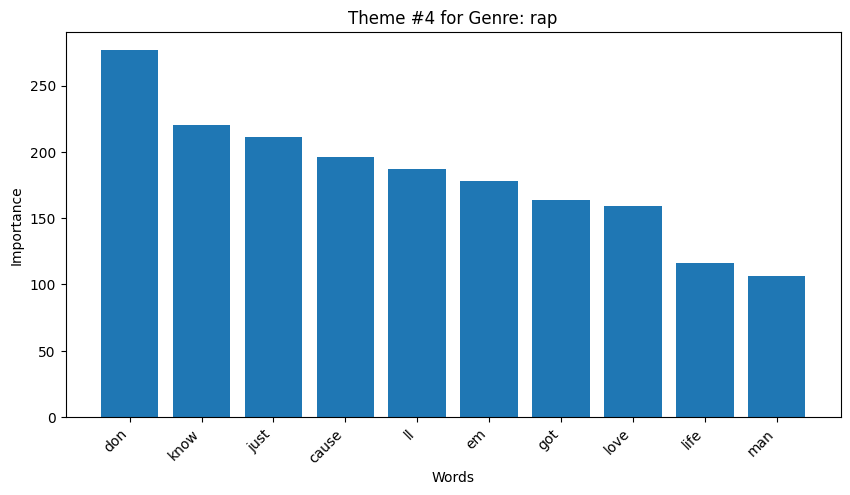

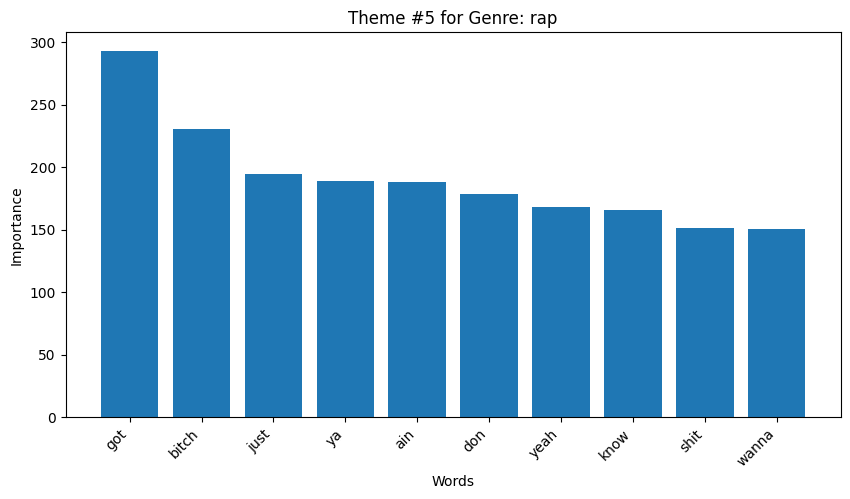

Themes for rap: [['nigga', 'got', 'don', 'niggas', 'yeah', 'ain', 'know', 'oh', 'just', 'shit'], ['said', 'people', 'didn', 'just', 'time', 'right', 'way', 'know', 'did', 'want'], ['yeah', 'know', 'don', 'got', 'make', 'bitch', 'love', 'money', 'hold', 'ain'], ['don', 'know', 'just', 'cause', 'll', 'em', 'got', 'love', 'life', 'man'], ['got', 'bitch', 'just', 'ya', 'ain', 'don', 'yeah', 'know', 'shit', 'wanna']]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Function to detect themes using LDA and create visualizations by genre
def detect_themes_by_genre(df, n_topics=5, n_top_words=10):
    genres = df['track_genre'].unique()
    for genre in genres:
        print(f"Detecting themes for genre: {genre}")
        genre_lyrics = df[df['track_genre'] == genre]['Lyrics'].tolist()
        vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
        dtm = vectorizer.fit_transform(genre_lyrics)
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
        lda.fit(dtm)

        themes = []
        feature_names = vectorizer.get_feature_names_out()

        for topic_idx, topic in enumerate(lda.components_):
            top_words_indices = topic.argsort()[:-n_top_words - 1:-1]
            top_words = [feature_names[i] for i in top_words_indices]
            themes.append(top_words)

            # Visualization
            plt.figure(figsize=(10, 5))
            plt.bar(np.arange(n_top_words), topic[top_words_indices], align='center')
            plt.xticks(np.arange(n_top_words), top_words, rotation=45, ha='right')
            plt.xlabel('Words')
            plt.ylabel('Importance')
            plt.title(f'Theme #{topic_idx + 1} for Genre: {genre}')
            plt.show()

        print(f"Themes for {genre}: {themes}")

# Apply the function to detect themes and visualize them by genre
detect_themes_by_genre(lyrics_data, n_topics=5, n_top_words=10)
